# Chapter 7 Exercises
Think Stats, 2nd Edition<br>
Pratool Gadtaula

In [1]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg

df = nsfg.ReadFemPreg()

After importing the data, I produced a HexBin scatter plot of the babies' birth weights vs. mother's ages at pregnancy outcome.

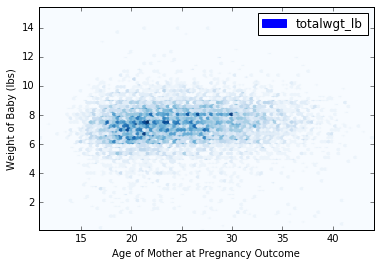

In [9]:
import thinkstats2
import numpy as np
import thinkplot
import math

ages, birthwgts = df['agepreg'], df['totalwgt_lb']

thinkplot.HexBin(ages, birthwgts)
thinkplot.Show(xlabel='Age of Mother at Pregnancy Outcome', \
               ylabel='Weight of Baby (lbs)')

Looking at the scatter plot, it seems as though the correlation is close to 0. The age of the mother seems to have little or no effect on the baby's weight.

In order to determine the range of bins, I look at the mean age of the mothers and the standard deviation and I choose $\pm$2 standard deviations because that includes about 95% of the mothers' ages.

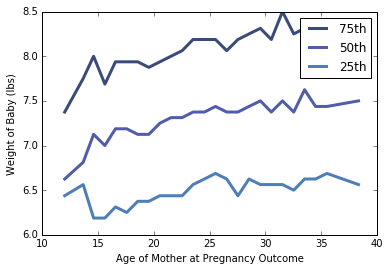

In [4]:
std_ages = np.std(ages)
bins = np.arange(ages.mean()-2*std_ages, ages.mean()+2*std_ages, 1)
indices = np.digitize(ages, bins)
groups = df.groupby(indices)

age_bins = [group['agepreg'].mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group['totalwgt_lb']) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age_bins, weights, label=label)
    

thinkplot.Show(xlabel='Age of Mother at Pregnancy Outcome', \
               ylabel='Weight of Baby (lbs)')

In [20]:
birthwgts_no_nan = []
ages_no_nan = []

# Removes both weight and age values if either is not a number
for i in range(len(birthwgts)):
    if not (math.isnan(birthwgts[i]) or math.isnan(ages[i])):
        birthwgts_no_nan.append(birthwgts[i])
        ages_no_nan.append(ages[i])
        
birthwgts_no_nan = np.asarray(birthwgts_no_nan)
ages_no_nan = np.asarray(ages_no_nan)

print 'Pearson\'s Correlation: %.4f' \
        %thinkstats2.Corr(ages_no_nan, birthwgts_no_nan)
print 'Spearman\'s Correlation: %.4f' \
        %thinkstats2.SpearmanCorr(ages_no_nan, birthwgts_no_nan)

Pearson's Correlation: 0.0688
Spearman's Correlation: 0.0946
